In [11]:
#импорт библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from warnings import simplefilter

simplefilter('ignore')

In [12]:
#Подгружаем DataSet
customers_dataset = pd.read_csv('Mall_Customers.csv', encoding='latin-1') 

In [13]:
customers_dataset

,CustomerID,Gender,Age,Annual_Income(k$),Spending_Score,Married,City,Number_of_sales
0,1,Male,19,15,39,N,Philadelphia,10
1,2,Male,21,15,81,Y,Philadelphia,11
2,3,Female,20,16,6,N,Philadelphia,8
3,4,Female,23,16,77,Y,Philadelphia,7
4,5,Female,31,17,40,Y,Philadelphia,9
...,...,...,...,...,...,...,...,...
63,64,Female,67,48,48,N,New York,44
64,65,Male,63,48,51,Y,New York,45
65,66,Male,89,48,59,Y,New York,48
66,67,Female,48,48,50,N,New York,45


In [14]:
#стандартные характеристики датасета
customers_dataset.shape

(68, 8)

In [15]:
customers_dataset.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [16]:
#Очистка нулевых строк
customers_dataset.isnull().sum()

CustomerID           0
Gender               0
Age                  0
Annual_Income(k$)    0
Spending_Score       0
Married              0
City                 0
Number_of_sales      0
dtype: int64

In [17]:
#Строк с нулевыми значениями не найдено

In [18]:
#Убираем ненужные столбцы, создаем новый датасет
customers_dataset_cat = customers_dataset.drop(["City", 'Married', 'Gender'], axis=1, inplace = True)
customers_dataset

,CustomerID,Age,Annual_Income(k$),Spending_Score,Number_of_sales
0,1,19,15,39,10
1,2,21,15,81,11
2,3,20,16,6,8
3,4,23,16,77,7
4,5,31,17,40,9
...,...,...,...,...,...
63,64,67,48,48,44
64,65,63,48,51,45
65,66,89,48,59,48
66,67,48,48,50,45


In [19]:
#Разделение выборки на обучающую и тестовую
from sklearn.model_selection import train_test_split
y = customers_dataset['Number_of_sales']
X = customers_dataset.drop('Number_of_sales', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
x_train

,CustomerID,Age,Annual_Income(k$),Spending_Score
18,19,52,23,29
9,10,30,19,72
36,37,42,34,17
64,65,63,48,51
51,52,33,42,60
23,24,31,25,73
53,54,59,43,60
48,49,29,40,42
55,56,47,43,41
46,47,50,40,55


In [20]:
y_train


18    13
9     10
36    18
64    45
51    30
23    15
53    30
48    31
55    31
46    27
30    20
52    37
15     8
54    32
7     10
67    44
50    36
33    21
5      4
45    31
1     11
59    43
2      8
22    20
47    32
17     7
26    16
14     6
39    25
29    19
44    24
20    14
32    22
38    24
63    44
60    47
41    26
57    43
43    30
10     6
19    12
61    43
21    15
0     10
56    45
3      7
24    18
Name: Number_of_sales, dtype: int64

In [21]:
#Масштбирование данных
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x_train.columns)
x_train.describe()

,CustomerID,Age,Annual_Income(k$),Spending_Score
count,47.000000,47.000000,47.000000,47.000000
mean,0.510956,0.407529,0.531915,0.496831
std,0.297031,0.316417,0.329406,0.276301
min,0.000000,0.000000,0.000000,0.000000
25%,0.276119,0.105769,0.242424,0.313830
50%,0.537313,0.326923,0.575758,0.500000
75%,0.768657,0.644231,0.833333,0.728723
max,1.000000,1.000000,1.000000,1.000000


In [23]:
#Обучение KNN с производным k

simplefilter('ignore')

def print_metrics(y_test, y_pred):
    print(f"R^2: {r2_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    
def print_cv_result(cv_model, x_test, y_test):
    print(f'Оптимизация метрики {cv_model.scoring}: {cv_model.best_score_}')
    print(f'Лучший параметр: {cv_model.best_params_}')
    print('Метрики на тестовом наборе')
    print_metrics(y_test, cv_model.predict(x_test))
    print()
base_k = 7
base_knn = KNeighborsRegressor(n_neighbors=base_k)
base_knn.fit(x_train, y_train)
y_pred_base = base_knn.predict(x_test)
print(f'Test metrics for KNN with k={base_k}\n')
print_metrics(y_test, y_pred_base)

Test metrics for KNN with k=7

R^2: 0.8408004377113437
MSE: 34.49757045675413
MAE: 4.73469387755102


In [24]:
#Кросс валидация
metrics = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
cv_values = [5, 10]

for cv in cv_values:
    print(f'Результаты кросс-валидации при cv={cv}\n')
    for metric in metrics:    
        params = {'n_neighbors': range(1, 30)}
        knn_cv = GridSearchCV(KNeighborsRegressor(), params, cv=cv, scoring=metric, n_jobs=-1)
        knn_cv.fit(x_train, y_train)
        print_cv_result(knn_cv, x_test, y_test)

Результаты кросс-валидации при cv=5

Оптимизация метрики r2: 0.8751043988050631
Лучший параметр: {'n_neighbors': 5}
Метрики на тестовом наборе
R^2: 0.8638676461354932
MSE: 29.49904761904762
MAE: 4.352380952380952

Оптимизация метрики neg_mean_squared_error: -18.308533333333333
Лучший параметр: {'n_neighbors': 5}
Метрики на тестовом наборе
R^2: 0.8638676461354932
MSE: 29.49904761904762
MAE: 4.352380952380952

Оптимизация метрики neg_mean_absolute_error: -3.1373333333333333
Лучший параметр: {'n_neighbors': 5}
Метрики на тестовом наборе
R^2: 0.8638676461354932
MSE: 29.49904761904762
MAE: 4.352380952380952

Результаты кросс-валидации при cv=10

Оптимизация метрики r2: 0.763701265961674
Лучший параметр: {'n_neighbors': 5}
Метрики на тестовом наборе
R^2: 0.8638676461354932
MSE: 29.49904761904762
MAE: 4.352380952380952

Оптимизация метрики neg_mean_squared_error: -19.919599999999996
Лучший параметр: {'n_neighbors': 5}
Метрики на тестовом наборе
R^2: 0.8638676461354932
MSE: 29.49904761904762
M

In [25]:
best_k = 5
y_pred_best = KNeighborsRegressor(n_neighbors=best_k).fit(x_train, y_train).predict(x_test)

In [26]:
#Сравнение исходной и оптимальной моделей
print('Basic model\n')
print_metrics(y_test, y_pred_base)
print('_______________________')
print('\nOptimal model\n')
print_metrics(y_test, y_pred_best)

Basic model

R^2: 0.8408004377113437
MSE: 34.49757045675413
MAE: 4.73469387755102
_______________________

Optimal model

R^2: 0.8638676461354932
MSE: 29.49904761904762
MAE: 4.352380952380952


In [27]:
#Визуализация результатов
res = pd.DataFrame({'y_test': y_test, 'y_pred_best': y_pred_best}).sort_values(by='y_test')
res.head()

,y_test,y_pred_best
8,1,15.4
11,4,9.4
13,5,8.8
6,6,12.2
16,7,13.8


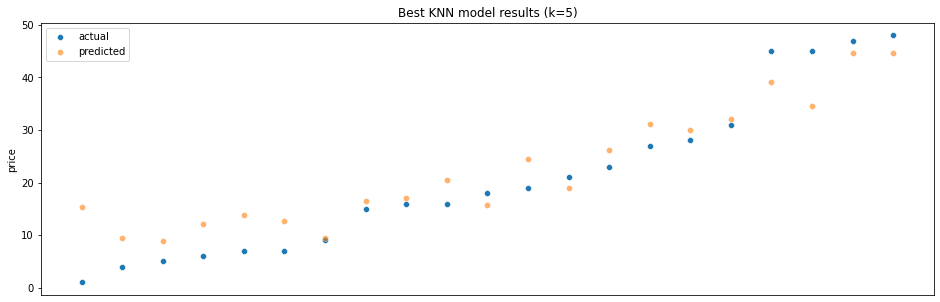

In [28]:
plt.figure(figsize=(16, 5))
sns.scatterplot(range(res.shape[0]), res['y_test'], label='actual')
sns.scatterplot(range(res.shape[0]), res['y_pred_best'], label='predicted', alpha=0.6)
plt.ylabel('price')
plt.xlabel('')
plt.title(f'Best KNN model results (k={best_k})')
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.show()